In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

1. Best Model
2. Runtime analysis - training / inference

### 1. Best Model
Measure: Accuracy

#### SVM CIFAR-10
According to SVM analysis, the best model of Support Vector Machine of CIFAR-10 is __{'C': 10, 'gamma': 0.01}__ with __accuracy 0.41__.

In [79]:
# SVM CIFAR-10
svm_cifar10 = {
    'train_time': [12.7, 14.2, 15.0, 14.6, 14.9, 18.1, 18.3, 19.2, 24.7, 17.8, 17.8, 16.5, 12.7, 20.5, 19.7, 13.5, 13.7, 23.5, 13.6, 11.0],
    'inference_time': [1.8363, 1.7501, 1.7759, 1.7416, 1.7637, 3.0569, 4.013, 2.8932, 3.6346, 2.8633, 2.8843, 2.9726, 2.8438, 2.8816, 2.8242, 3.4827, 3.5505, 2.9039, 2.7334, 2.7274],
    'accuracy': [0.41, 0.347, 0.32, 0.317, 0.317, 0.123, 0.123, 0.123, 0.32, 0.267, 0.127, 0.403, 0.397, 0.293, 0.413, 0.393, 0.393, 0.41, 0.407, 0.373]
}

svm_cifar10_cv = {
    'time': [53.7, 55.3, 62.8, 61.4, 61.5, 81.2, 79.3, 80.0, 80.1, 77.1, 79.5, 75.9, 65.7, 76.3, 81.4, 59.9, 65.2, 80.8, 68.1, 58.8],
    'mean_accuracy': [0.362, 0.332, 0.305, 0.306, 0.306, 0.114, 0.114, 0.114, 0.259, 0.241, 0.114, 0.401, 0.379, 0.266, 0.412, 0.403, 0.359, 0.412, 0.379, 0.372],
    'std_accuracy': [0.016, 0.006, 0.013, 0.012, 0.012, 0.001, 0.001, 0.001, 0.022, 0.012, 0.001, 0.02, 0.02, 0.017, 0.021, 0.019, 0.019, 0.021, 0.008, 0.015]
}

In [74]:
# Train/Test Splitting
linearsvm_cifar10 = {
    'train_time': [12.7, 14.2, 15.0, 14.6, 14.9],
    'inference_time': [1.8363, 1.7501, 1.7759, 1.7416, 1.7637],
    'accuracy': [0.41, 0.347, 0.32, 0.317, 0.317],
    'C': [0.01, 0.1, 1, 10, 100],
}

nonlinearsvm_cifar10 = {
    'train_time': [18.1, 18.3, 19.2, 24.7, 17.8, 17.8, 16.5, 12.7, 20.5, 19.7, 13.5, 13.7, 23.5, 13.6, 11.0],
    'inference_time': [3.0569, 4.013, 2.8932, 3.6346, 2.8633, 2.8843, 2.9726, 2.8438, 2.8816, 2.8242, 3.4827, 3.5505, 2.9039, 2.7334, 2.7274],
    'accuracy': [0.123, 0.123, 0.123, 0.32, 0.267, 0.127, 0.403, 0.397, 0.293, 0.413, 0.393, 0.393, 0.41, 0.407, 0.373],
    'gamma': [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    'C': [0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100]
}

# Cross-validation
linearsvm_cifar10_cv = {
    'mean_accuracy': [0.362, 0.332, 0.305, 0.306, 0.306],
    'std_accuracy': [0.016, 0.006, 0.013, 0.012, 0.012],
    'C': [0.01, 0.1, 1, 10, 100],
}

nonlinearsvm_cifar10_cv = {
    'mean_accuracy': [0.114, 0.114, 0.114, 0.259, 0.241, 0.114, 0.401, 0.379, 0.266, 0.412, 0.403, 0.359, 0.412, 0.379, 0.372],
    'std_accuracy': [0.001, 0.001, 0.001, 0.022, 0.012, 0.001, 0.02, 0.02, 0.017, 0.021, 0.019, 0.019, 0.021, 0.008, 0.015],
    'gamma': [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    'C': [0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100]
}

best C:  0.01
training time:  12.7 s
inference time:  1.8363 s
accuracy:  0.41


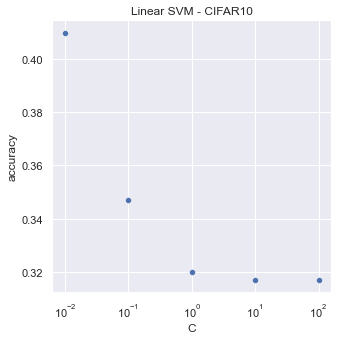

In [93]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="C", y="accuracy", data=linearsvm_cifar10);
splot.set(xscale="log")
splot.set_title("Linear SVM - CIFAR10")

# best model
max_idx = np.argmax(linearsvm_cifar10['accuracy'])
print('best C: ', linearsvm_cifar10['C'][max_idx])
print('training time: ',  linearsvm_cifar10['train_time'][max_idx], 's')
print('inference time: ',  linearsvm_cifar10['inference_time'][max_idx], 's')
print('accuracy: ',  linearsvm_cifar10['accuracy'][max_idx])

best C:  10
best gamma:  0.01
training time:  19.7 s
inference time:  2.8242 s
accuracy:  0.413


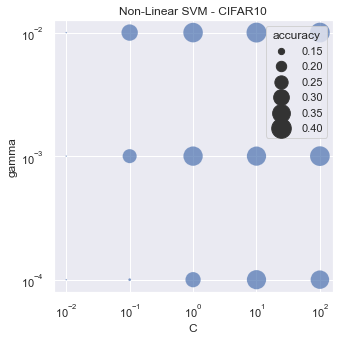

In [92]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(data=nonlinearsvm_cifar10, x="C", y="gamma", size="accuracy", alpha=0.7, sizes=(2, 400))
splot.set(xscale="log")
splot.set(yscale="log")
splot.set_title("Non-Linear SVM - CIFAR10")

# best model
max_idx = np.argmax(nonlinearsvm_cifar10['accuracy'])
print('best C: ', nonlinearsvm_cifar10['C'][max_idx])
print('best gamma: ', nonlinearsvm_cifar10['gamma'][max_idx])
print('training time: ',  nonlinearsvm_cifar10['train_time'][max_idx], 's')
print('inference time: ',  nonlinearsvm_cifar10['inference_time'][max_idx], 's')
print('accuracy: ',  nonlinearsvm_cifar10['accuracy'][max_idx])

best C:  0.01
mean accuracy:  0.362


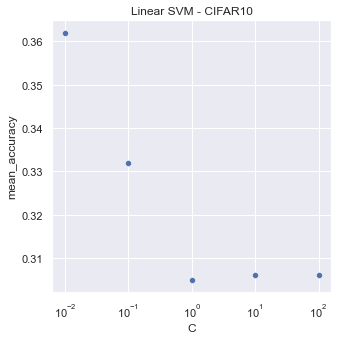

In [73]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="C", y="mean_accuracy", data=linearsvm_cifar10_cv);
splot.set(xscale="log")
splot.set_title("Linear SVM - CIFAR10")

# best model
max_idx = np.argmax(linearsvm_cifar10_cv['mean_accuracy'])
print('best C: ', linearsvm_cifar10_cv['C'][max_idx])
print('mean accuracy: ',  linearsvm_cifar10_cv['mean_accuracy'][max_idx])

best C:  10
best gamma:  0.01
mean accuracy:  0.412


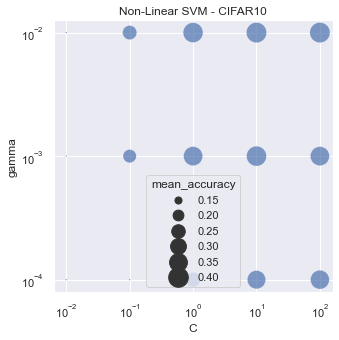

In [78]:
plt.figure(figsize=(5,5))

splot = sns.scatterplot(data=nonlinearsvm_cifar10_cv, x="C", y="gamma", size="mean_accuracy", alpha=0.7, sizes=(2, 400),)
splot.set(xscale="log")
splot.set(yscale="log")
splot.set_title("Non-Linear SVM - CIFAR10")

# best model
max_idx = np.argmax(nonlinearsvm_cifar10_cv['mean_accuracy'])
print('best C: ', nonlinearsvm_cifar10_cv['C'][max_idx])
print('best gamma: ', nonlinearsvm_cifar10_cv['gamma'][max_idx])
print('mean accuracy: ',  nonlinearsvm_cifar10_cv['mean_accuracy'][max_idx])

#### SVM CIFAR-100
According to SVM analysis, the best model of Support Vector Machine of CIFAR-100 is __{'C': 10, 'gamma': 0.001}__ with __accuracy 0.157__.

In [81]:
# SVM CIFAR-100
svm_cifar100 = {
    'train_time': [14.8, 17.1, 16.2, 16.2, 16.6, 19.8, 19.1, 18.5, 19.9, 18.7, 18.8, 20.7, 17.9, 18.8, 20.7, 16.8, 16.6, 20.1, 17.5, 15.5],
    'inference_time': [2.4189, 2.0595, 2.0686, 2.0466, 2.0679, 3.1125, 3.1505, 3.0553, 3.0598, 3.0928, 3.7292, 3.14, 3.1281, 3.0436, 3.9883, 3.0868, 3.0977, 3.2379, 3.1257, 3.0161],
    'accuracy': [0.143, 0.133, 0.127, 0.127, 0.127, 0.02, 0.02, 0.02, 0.02, 0.027, 0.02, 0.137, 0.097, 0.03, 0.14, 0.157, 0.107, 0.14, 0.153, 0.143]
}

svm_cifar100_cv = {
    'time': [58.7, 64.9, 64.3, 64.3, 64.4, 81.3, 79.3, 77.8, 81.7, 79.8, 79.7, 82.3, 75.1, 78.3, 81.2, 75.0, 73.2, 82.6, 76.6, 71.4],
    'mean_accuracy': [0.131, 0.123, 0.12, 0.12, 0.12, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.127, 0.095, 0.021, 0.135, 0.14, 0.1, 0.135, 0.133, 0.137],
    'std_accuracy': [0.016, 0.013, 0.011, 0.011, 0.011, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.012, 0.009, 0.003, 0.014, 0.018, 0.007, 0.014, 0.017, 0.02]
}

In [87]:
# Train/Test Splitting
linearsvm_cifar100 = {
    'train_time': [14.8, 17.1, 16.2, 16.2, 16.6],
    'inference_time': [2.4189, 2.0595, 2.0686, 2.0466, 2.0679],
    'accuracy': [0.143, 0.133, 0.127, 0.127, 0.127],
    'C': [0.01, 0.1, 1, 10, 100],
}

nonlinearsvm_cifar100 = {
    'train_time': [18.1, 18.3, 19.2, 24.7, 17.8, 17.8, 16.5, 12.7, 20.5, 19.7, 13.5, 13.7, 23.5, 13.6, 11.0],
    'inference_time': [3.0569, 4.013, 2.8932, 3.6346, 2.8633, 2.8843, 2.9726, 2.8438, 2.8816, 2.8242, 3.4827, 3.5505, 2.9039, 2.7334, 2.7274],
    'accuracy': [0.02, 0.02, 0.02, 0.02, 0.027, 0.02, 0.137, 0.097, 0.03, 0.14, 0.157, 0.107, 0.14, 0.153, 0.143],
    'gamma': [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    'C': [0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100]
}

# Cross-validation
linearsvm_cifar100_cv = {
    'mean_accuracy': [0.131, 0.123, 0.12, 0.12, 0.12],
    'std_accuracy': [0.016, 0.013, 0.011, 0.011, 0.011],
    'C': [0.01, 0.1, 1, 10, 100],
}

nonlinearsvm_cifar100_cv = {
    'mean_accuracy': [0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.127, 0.095, 0.021, 0.135, 0.14, 0.1, 0.135, 0.133, 0.137],
    'std_accuracy': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.012, 0.009, 0.003, 0.014, 0.018, 0.007, 0.014, 0.017, 0.02],
    'gamma': [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    'C': [0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10, 100, 100, 100]
}

best C:  0.01
training time:  14.8 s
inference time:  2.4189 s
accuracy:  0.143


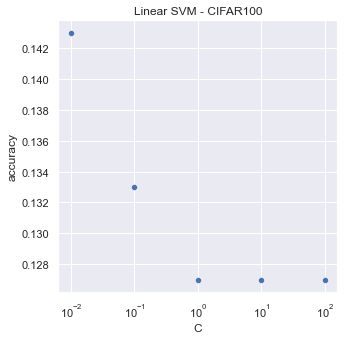

In [94]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="C", y="accuracy", data=linearsvm_cifar100);
splot.set(xscale="log")
splot.set_title("Linear SVM - CIFAR100")

# best model
max_idx = np.argmax(linearsvm_cifar100['accuracy'])
print('best C: ', linearsvm_cifar100['C'][max_idx])
print('training time: ',  linearsvm_cifar100['train_time'][max_idx], 's')
print('inference time: ',  linearsvm_cifar100['inference_time'][max_idx], 's')
print('accuracy: ',  linearsvm_cifar100['accuracy'][max_idx])

best C:  10
best gamma:  0.001
training time:  13.5 s
inference time:  3.4827 s
accuracy:  0.157


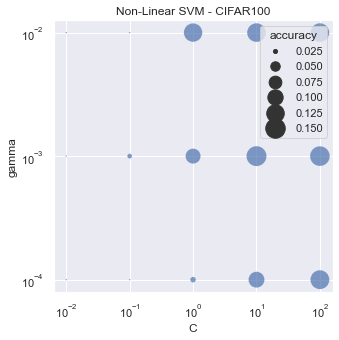

In [95]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(data=nonlinearsvm_cifar100, x="C", y="gamma", size="accuracy", alpha=0.7, sizes=(2, 400))
splot.set(xscale="log")
splot.set(yscale="log")
splot.set_title("Non-Linear SVM - CIFAR100")

# best model
max_idx = np.argmax(nonlinearsvm_cifar100['accuracy'])
print('best C: ', nonlinearsvm_cifar100['C'][max_idx])
print('best gamma: ', nonlinearsvm_cifar100['gamma'][max_idx])
print('training time: ',  nonlinearsvm_cifar100['train_time'][max_idx], 's')
print('inference time: ',  nonlinearsvm_cifar100['inference_time'][max_idx], 's')
print('accuracy: ',  nonlinearsvm_cifar100['accuracy'][max_idx])

best C:  0.01
mean accuracy:  0.131


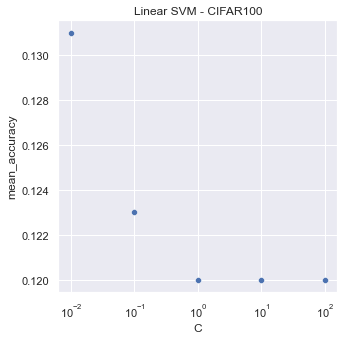

In [90]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="C", y="mean_accuracy", data=linearsvm_cifar100_cv);
splot.set(xscale="log")
splot.set_title("Linear SVM - CIFAR100")

# best model
max_idx = np.argmax(linearsvm_cifar100_cv['mean_accuracy'])
print('best C: ', linearsvm_cifar100_cv['C'][max_idx])
print('mean accuracy: ',  linearsvm_cifar100_cv['mean_accuracy'][max_idx])

best C:  10
best gamma:  0.001
mean accuracy:  0.14


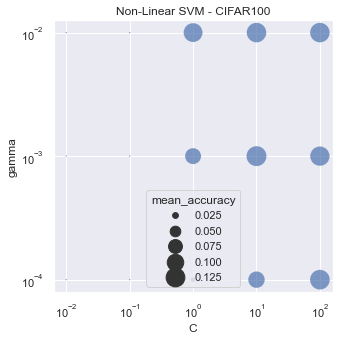

In [91]:
plt.figure(figsize=(5,5))

splot = sns.scatterplot(data=nonlinearsvm_cifar100_cv, x="C", y="gamma", size="mean_accuracy", alpha=0.7, sizes=(2, 400),)
splot.set(xscale="log")
splot.set(yscale="log")
splot.set_title("Non-Linear SVM - CIFAR100")

# best model
max_idx = np.argmax(nonlinearsvm_cifar100_cv['mean_accuracy'])
print('best C: ', nonlinearsvm_cifar100_cv['C'][max_idx])
print('best gamma: ', nonlinearsvm_cifar100_cv['gamma'][max_idx])
print('mean accuracy: ',  nonlinearsvm_cifar100_cv['mean_accuracy'][max_idx])

#### KNN CIFAR-10
the best model of k-Nearest Neighbour of CIFAR-10 is __{'distance_measure': L1}__ with __accuracy 0.31__.

In [101]:
# KNN CIFAR-10

# Train/Test Splitting
knn_cifar10 = {
    'accuracy': [0.31, 0.29],
    'inference_time': [11.9282, 14.6598],
    'train_time': [0.0, 0.0],
    'distance_measure': ['L1','L2'],
}

# Cross-validation
knn_cifar10_cv = {
    'time': [97.5, 112.6],
    'mean_accuracy': [0.294, 0.271],
    'std_accuracy': [0.005, 0.007],
    'distance_measure': ['L1','L2'],
}

In [110]:
# best model
print('---train/test split---')
max_idx = np.argmax(knn_cifar10['accuracy'])
print('best measure: ', knn_cifar10['distance_measure'][max_idx])
print('accuracy: ', knn_cifar10['accuracy'][max_idx])
print()

# best model
print('---cross-validation---')
max_idx = np.argmax(knn_cifar10_cv['mean_accuracy'])
print('best measure: ', knn_cifar10_cv['distance_measure'][max_idx])
print('mean accuracy: ',  knn_cifar10_cv['mean_accuracy'][max_idx])

---train/test split---
best measure:  L1
accuracy:  0.31

---cross-validation---
best measure:  L1
mean accuracy:  0.294


#### KNN CIFAR-100
the best model of k-Nearest Neighbour of CIFAR-100 is __{'distance_measure': L1}__ with __accuracy 0.084__.

In [111]:
knn_cifar100 = {
    'accuracy': [0.067, 0.057],
    'inference_time': [11.285, 15.1987],
    'train_time': [0.0, 0.0],
    'distance_measure': ['L1','L2'],
}

knn_cifar100_cv = {
    'time': [88.9, 113.0],
    'mean_accuracy': [0.084, 0.075],
    'std_accuracy': [0.009, 0.007],
    'distance_measure': ['L1','L2'],
}

In [112]:
# best model
print('---train/test split---')
max_idx = np.argmax(knn_cifar100['accuracy'])
print('best measure: ', knn_cifar100['distance_measure'][max_idx])
print('accuracy: ', knn_cifar100['accuracy'][max_idx])
print()

# best model
print('---cross-validation---')
max_idx = np.argmax(knn_cifar100_cv['mean_accuracy'])
print('best measure: ', knn_cifar100_cv['distance_measure'][max_idx])
print('mean accuracy: ',  knn_cifar100_cv['mean_accuracy'][max_idx])

---train/test split---
best measure:  L1
accuracy:  0.067

---cross-validation---
best measure:  L1
mean accuracy:  0.084


#### Decision Tree CIFAR-10

In [180]:
# DT CIFAR-10
# dt_cifar10_1 = {
#     'train_time': [72.4, 67.9, 63.7, 318.0, 300.7, 275.7, 71.4, 66.7, 63.8, 324.4, 307.8, 288.4, 71.0, 66.1, 65.8, 314.9, 303.3, 277.8],
#     'inference_time': [0.0032, 0.0055, 0.0046, 0.0056, 0.0036, 0.0035, 0.0032, 0.0043, 0.0038, 0.0043, 0.0047, 0.0039, 0.0041, 0.0039, 0.0041, 0.003, 0.0027, 0.0053],
#     'accuracy': [0.23, 0.21, 0.243, 0.217, 0.233, 0.253, 0.227, 0.223, 0.187, 0.203, 0.23, 0.253, 0.213, 0.247, 0.247, 0.19, 0.233, 0.233],
#     'max_depth': [100, 100, 100, 100, 100, 100, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000],
#     'max_features': [12, 12, 12, 55, 55, 55, 12, 12, 12, 55, 55, 55, 12, 12, 12, 55, 55, 55],
#     'min_sample_split': [5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20], 
# }

# dt_cifar10_2 = {
#     'train_time': [268.2, 269.5, 202.9, 524.9, 482.2, 380.2],
#     'inference_time': [0.004, 0.0025, 0.002, 0.004, 0.0037, 0.0044],
#     'accuracy': [0.243, 0.257, 0.28, 0.257, 0.24, 0.217],
#     'max_depth': [100, 100, 100, 100, 100, 100],
#     'max_features': [55, 55, 55, 100, 100, 100],
#     'min_sample_split': [30, 40, 100, 30, 40, 100],
# }

dt_cifar10 = {
    'train_time': [72.4, 67.9, 63.7, 318.0, 300.7, 275.7, 71.4, 66.7, 63.8, 324.4, 307.8, 288.4, 71.0, 66.1, 65.8, 314.9, 303.3, 277.8, 268.2, 269.5, 202.9, 524.9, 482.2, 380.2],
    'inference_time': [0.0032, 0.0055, 0.0046, 0.0056, 0.0036, 0.0035, 0.0032, 0.0043, 0.0038, 0.0043, 0.0047, 0.0039, 0.0041, 0.0039, 0.0041, 0.003, 0.0027, 0.0053, 0.004, 0.0025, 0.002, 0.004, 0.0037, 0.0044],
    'accuracy': [0.23, 0.21, 0.243, 0.217, 0.233, 0.253, 0.227, 0.223, 0.187, 0.203, 0.23, 0.253, 0.213, 0.247, 0.247, 0.19, 0.233, 0.233, 0.243, 0.257, 0.28, 0.257, 0.24, 0.217],
    'max_depth': [100, 100, 100, 100, 100, 100, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 100, 100, 100, 100, 100, 100],
    'max_features': [12, 12, 12, 55, 55, 55, 12, 12, 12, 55, 55, 55, 12, 12, 12, 55, 55, 55, 55, 55, 55, 100, 100, 100],
    'min_sample_split': [5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20, 5, 10, 20, 30, 40, 100, 30, 40, 100], 
}

In [147]:
# utils function
def find_at(key, val, data):
    idxs = []
    sel_data = {'accuracy': [], 'max_depth':[], 'max_features': [], 'min_sample_split': []}
    for i, item in enumerate(data[key]):
        if item == val:
            idxs.append(i)
            
    for idx in idxs:
        sel_data['accuracy'].append(data['accuracy'][idx])
        sel_data['max_depth'].append(data['max_depth'][idx])
        sel_data['max_features'].append(data['max_features'][idx])
        sel_data['min_sample_split'].append(data['min_sample_split'][idx])
    return sel_data

In [155]:
max_features12 = find_at('max_features', 12, dt_cifar10)
max_features55 = find_at('max_features', 55, dt_cifar10)
max_features100 = find_at('max_features', 100, dt_cifar10)

<AxesSubplot:title={'center':'100'}, xlabel='max_depth', ylabel='min_sample_split'>

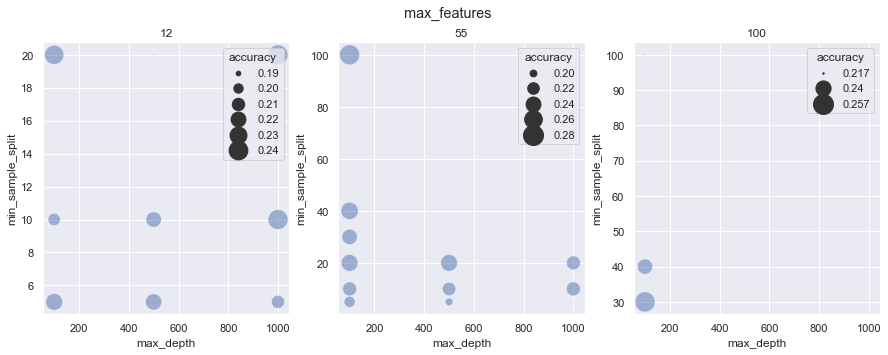

In [178]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('max_features')
axes[0].set_title('12')
axes[1].set_title('55')
axes[2].set_title('100')
sns.scatterplot(ax=axes[0], data=max_features12, x="max_depth", y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[1], data=max_features55, x="max_depth", y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[2], data=max_features100, x="max_depth", y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))

<AxesSubplot:title={'center':'1000'}, xlabel='max_features', ylabel='min_sample_split'>

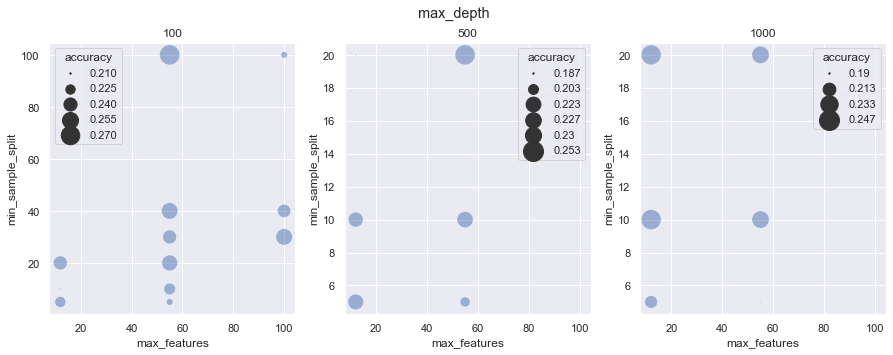

In [181]:
max_depth100 = find_at('max_depth', 100, dt_cifar10)
max_depth500 = find_at('max_depth', 500, dt_cifar10)
max_depth1000 = find_at('max_depth', 1000, dt_cifar10)

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('max_depth')
axes[0].set_title('100')
axes[1].set_title('500')
axes[2].set_title('1000')
sns.scatterplot(ax=axes[0], data=max_depth100, x='max_features', y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[1], data=max_depth500, x='max_features', y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[2], data=max_depth1000, x='max_features', y="min_sample_split", size="accuracy", alpha=0.5, sizes=(2, 400))

You can see the tendency that accuracy is increasing as minimum samples to split is bigger.<br>
It seems that more features to search (max_features) do not improve accuracy.

<AxesSubplot:title={'center':'100'}, xlabel='max_features', ylabel='max_depth'>

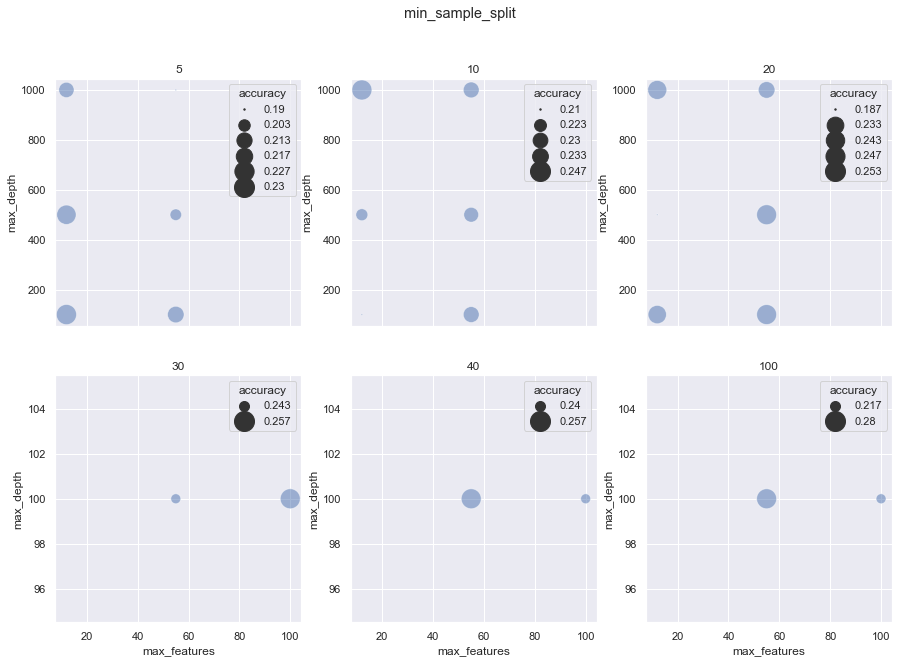

In [195]:
min_sample_split5 = find_at('min_sample_split', 5, dt_cifar10)
min_sample_split10 = find_at('min_sample_split', 10, dt_cifar10)
min_sample_split20 = find_at('min_sample_split', 20, dt_cifar10)
min_sample_split30 = find_at('min_sample_split', 30, dt_cifar10)
min_sample_split40 = find_at('min_sample_split', 40, dt_cifar10)
min_sample_split100 = find_at('min_sample_split', 100, dt_cifar10)

fig, axes = plt.subplots(2, 3, sharex=True, figsize=(15,10))
fig.suptitle('min_sample_split')
axes[0][0].set_title('5')
axes[0][1].set_title('10')
axes[0][2].set_title('20')
axes[1][0].set_title('30')
axes[1][1].set_title('40')
axes[1][2].set_title('100')
sns.scatterplot(ax=axes[0][0], data=min_sample_split5, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[0][1], data=min_sample_split10, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[0][2], data=min_sample_split20, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(2, 400))
sns.scatterplot(ax=axes[1][0], data=min_sample_split30, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(100, 400))
sns.scatterplot(ax=axes[1][1], data=min_sample_split40, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(100, 400))
sns.scatterplot(ax=axes[1][2], data=min_sample_split100, x='max_features', y="max_depth", size="accuracy", alpha=0.5, sizes=(100, 400))

In [197]:
# best model
max_idx = np.argmax(dt_cifar10['accuracy'])
print('best max depth: ', dt_cifar10['max_depth'][max_idx])
print('best max features: ', dt_cifar10['max_features'][max_idx])
print('best min samples to split: ', dt_cifar10['min_sample_split'][max_idx])
print('training time: ',  dt_cifar10['train_time'][max_idx], 's')
print('inference time: ',  dt_cifar10['inference_time'][max_idx], 's')
print('accuracy: ',  dt_cifar10['accuracy'][max_idx])

best max depth:  100
best max features:  55
best min samples to split:  100
training time:  202.9 s
inference time:  0.002 s
accuracy:  0.28


Text(0.5, 1.0, 'Decision Tree - CIFAR10')

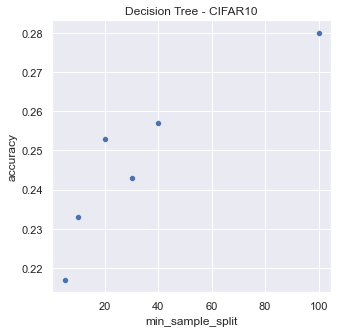

In [198]:
# best max depth:  100
# best max searching features:  55

sample_split_dt = {
    'accuracy': [ 0.217, 0.233, 0.253, 0.243, 0.257, 0.28],
    'min_sample_split': [5, 10, 20, 30, 40, 100]
}

# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="min_sample_split", y="accuracy", data=sample_split_dt);
splot.set_title("Decision Tree - CIFAR10")

In [ ]:
# best min samples to split: 100
# best max searching features: 55

depth_dt = {
    'accuracy': [0.28, ],
    'max_depth': [100, ]
}

# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="min_sample_split", y="accuracy", data=sample_split_dt);
# splot.set(xscale="log")
splot.set_title("Decision Tree - CIFAR10")

Text(0.5, 1.0, 'Decision Tree - CIFAR10')

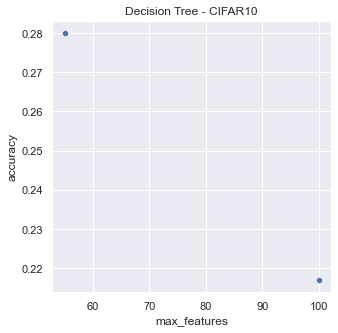

In [132]:
# best max depth:  100
# best min samples to split: 100

features_dt = {
    'accuracy': [0.28, 0.217],
    'max_features': [55, 100]
}

# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="max_features", y="accuracy", data=features_dt);
# splot.set(xscale="log")
splot.set_title("Decision Tree - CIFAR10")

Text(0.5, 1.0, 'Decision Tree - CIFAR10')

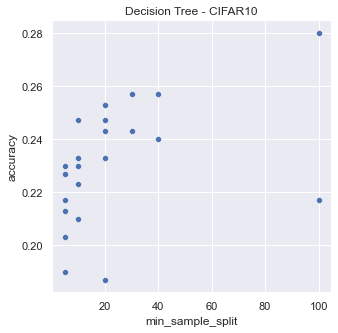

In [121]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="min_sample_split", y="accuracy", data=dt_cifar10);
# splot.set(xscale="log")
splot.set_title("Decision Tree - CIFAR10")

best max depth:  100
best max searching features:  55
best min samples to split:  100
training time:  202.9 s
inference time:  0.002 s
accuracy:  0.28


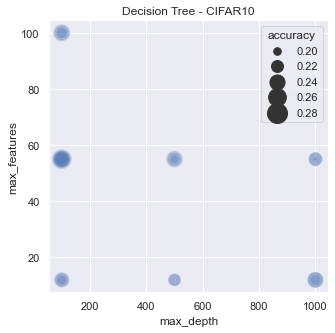

In [120]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(data=dt_cifar10, x="max_depth", y="max_features", size="accuracy", alpha=0.3, sizes=(2, 400),)
# splot.set(xscale="log")
# splot.set(yscale="log")
splot.set_title("Decision Tree - CIFAR10")


# plt.figure(figsize=(5,5))

# splot = sns.scatterplot(x="max_features", y="accuracy", data=dt_cifar10);
# # splot.set(xscale="log")
# splot.set_title("Decision Tree - CIFAR10")

# best model
max_idx = np.argmax(dt_cifar10['accuracy'])
print('best max depth: ', dt_cifar10['max_depth'][max_idx])
print('best max searching features: ', dt_cifar10['max_features'][max_idx])
print('best min samples to split: ', dt_cifar10['min_sample_split'][max_idx])
print('training time: ',  dt_cifar10['train_time'][max_idx], 's')
print('inference time: ',  dt_cifar10['inference_time'][max_idx], 's')
print('accuracy: ',  dt_cifar10['accuracy'][max_idx])

#### Decision Tree CIFAR-100

#### Random Forest CIFAR-10
the best model of Random Forest of CIFAR-10 is __{'n_trees': 10}__ with __accuracy 0.3__.

In [135]:
rf_cifar10 = {
    'train_time': [483.8, 878.9, 1668.2],
    'inference_time': [0.0074, 0.0099, 0.0177],
    'accuracy': [0.26, 0.29, 0.333],
    'n_trees': [3, 5, 10],
}

rf_cifar10_cv = {
    'time': [1766.0, 3013.9, 7016.2],
    'mean_accuracy': [0.228, 0.268, 0.30],
    'std_accuracy': [0.010, 0.008, 0.011],
    'n_trees': [3, 5, 10],
}

---train/test split---
best n_trees:  10
training time:  1668.2 s
inference time:  0.0177 s
accuracy:  0.333


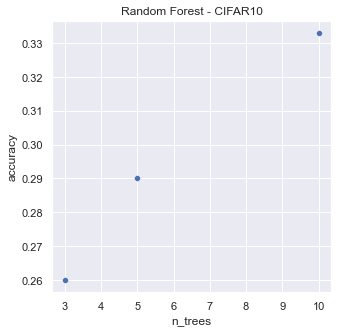

In [140]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="n_trees", y="accuracy", data=rf_cifar10);
splot.set_title("Random Forest - CIFAR10")

# best model
print('---train/test split---')
max_idx = np.argmax(rf_cifar10['accuracy'])
print('best n_trees: ', rf_cifar10['n_trees'][max_idx])
print('training time: ', rf_cifar10['train_time'][max_idx], 's')
print('inference time: ', rf_cifar10['inference_time'][max_idx], 's')
print('accuracy: ',  rf_cifar10['accuracy'][max_idx])

---cross-validation---
best n_trees:  10
training time:  7016.2 s
mean_accuracy:  0.3


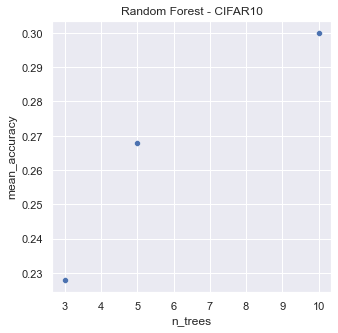

In [142]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="n_trees", y="mean_accuracy", data=rf_cifar10_cv);
splot.set_title("Random Forest - CIFAR10")

# best model
print('---cross-validation---')
max_idx = np.argmax(rf_cifar10_cv['mean_accuracy'])
print('best n_trees: ', rf_cifar10_cv['n_trees'][max_idx])
print('training time: ', rf_cifar10_cv['time'][max_idx], 's')
print('mean_accuracy: ',  rf_cifar10_cv['mean_accuracy'][max_idx])

#### Random Forest CIFAR-100
the best model of Random Forest of CIFAR-10 is __{'n_trees': 10}__ with __accuracy 0.047__.

In [143]:
rf_cifar100 = {
    'train_time': [965.1, 1606.5, 3248.9], 
    'inference_time': [0.0066, 0.0088, 0.0129], 
    'accuracy': [0.037, 0.043, 0.027],
    'n_trees': [3, 5, 10],
}

rf_cifar100_cv = {
    'time': [4210.0, 6963.4, 14451.7],
    'mean_accuracy': [0.039, 0.044, 0.047],
    'std_accuracy': [0.0043, 0.0076, 0.005],
    'n_trees': [3, 5, 10],
}

---train/test split---
best n_trees:  5
training time:  1606.5 s
inference time:  0.0088 s
accuracy:  0.043


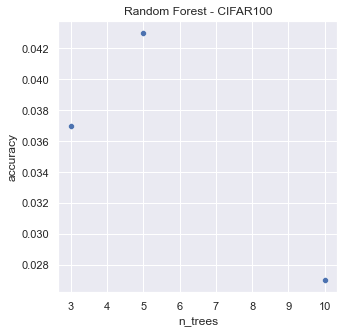

In [144]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="n_trees", y="accuracy", data=rf_cifar100);
splot.set_title("Random Forest - CIFAR100")

# best model
print('---train/test split---')
max_idx = np.argmax(rf_cifar100['accuracy'])
print('best n_trees: ', rf_cifar100['n_trees'][max_idx])
print('training time: ', rf_cifar100['train_time'][max_idx], 's')
print('inference time: ', rf_cifar100['inference_time'][max_idx], 's')
print('accuracy: ',  rf_cifar100['accuracy'][max_idx])

---cross-validation---
best n_trees:  10
training time:  14451.7 s
mean_accuracy:  0.047


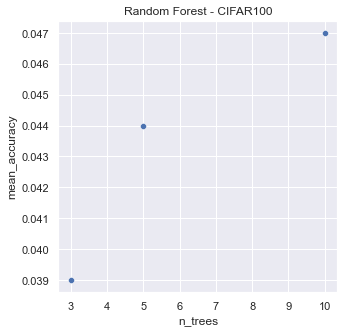

In [145]:
# plot
plt.figure(figsize=(5,5))

splot = sns.scatterplot(x="n_trees", y="mean_accuracy", data=rf_cifar100_cv);
splot.set_title("Random Forest - CIFAR100")

# best model
print('---cross-validation---')
max_idx = np.argmax(rf_cifar100_cv['mean_accuracy'])
print('best n_trees: ', rf_cifar100_cv['n_trees'][max_idx])
print('training time: ', rf_cifar100_cv['time'][max_idx], 's')
print('mean_accuracy: ',  rf_cifar100_cv['mean_accuracy'][max_idx])

### Run time analysis